In [ ]:
# Import the needed libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
##
from tqdm import tqdm
from glob import glob
from pathlib import Path
import random

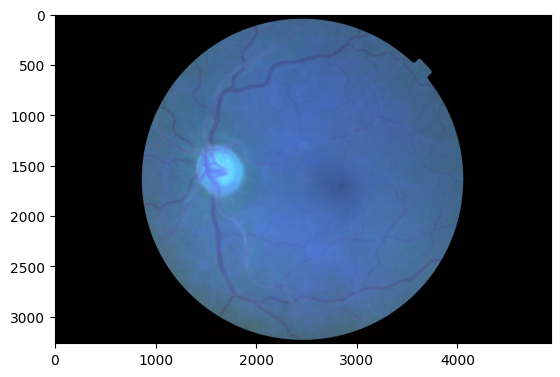

In [ ]:
# read the image

I = cv2.imread('/image.jpeg')
plt.imshow(I)
plt.show()

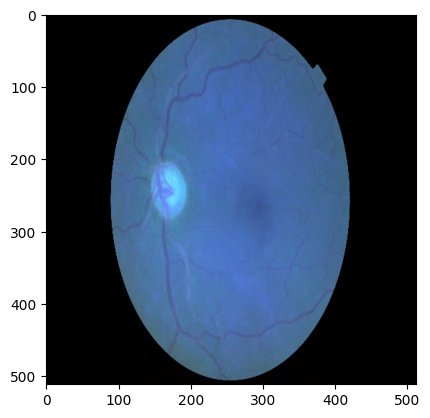

In [ ]:
resized_image =cv2.resize(I,(512,512))
plt.imshow(resized_image)
plt.show()

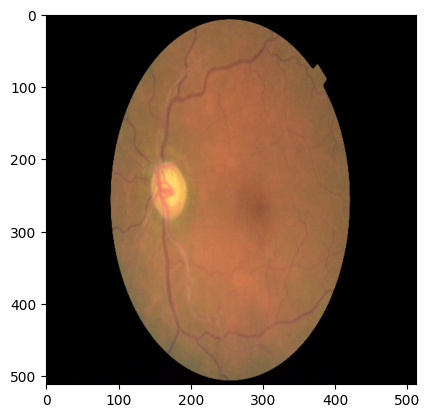

In [ ]:
# Convert the reseized image to RGB
rgb_image= cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB)
# show the rgb image
plt.imshow(rgb_image)
plt.show()

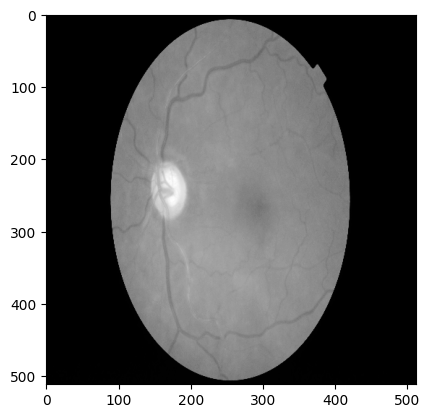

In [ ]:
# Convert the reseized image to grayscale
gray_image = cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
# show the reseized gray image
plt.imshow(gray_image, cmap= 'gray')
plt.show()

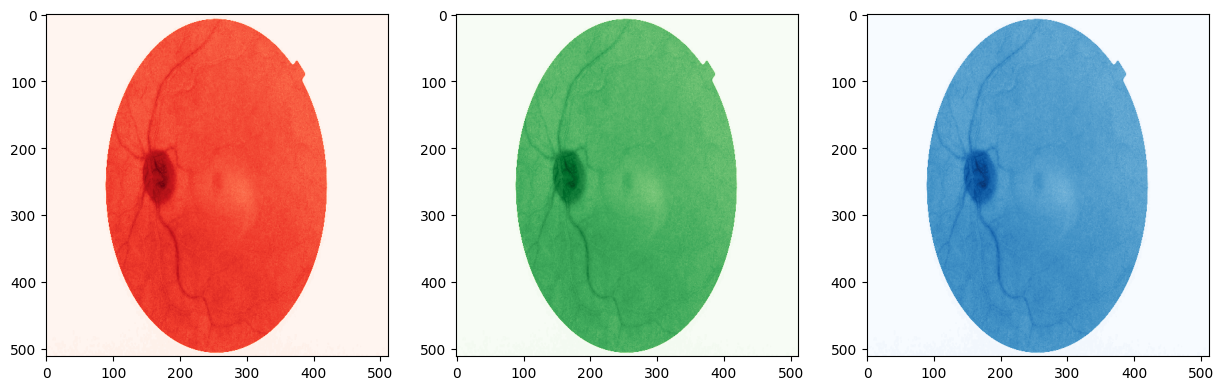

In [ ]:
# Split the reseized image into its three color channels
R, G, B = cv2.split(resized_image)
# show the channels in one plot
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(R, cmap='Reds')
plt.subplot(1,3,2)
plt.imshow(R, cmap='Greens')
plt.subplot(1,3,3)
plt.imshow(R, cmap='Blues')
plt.show()

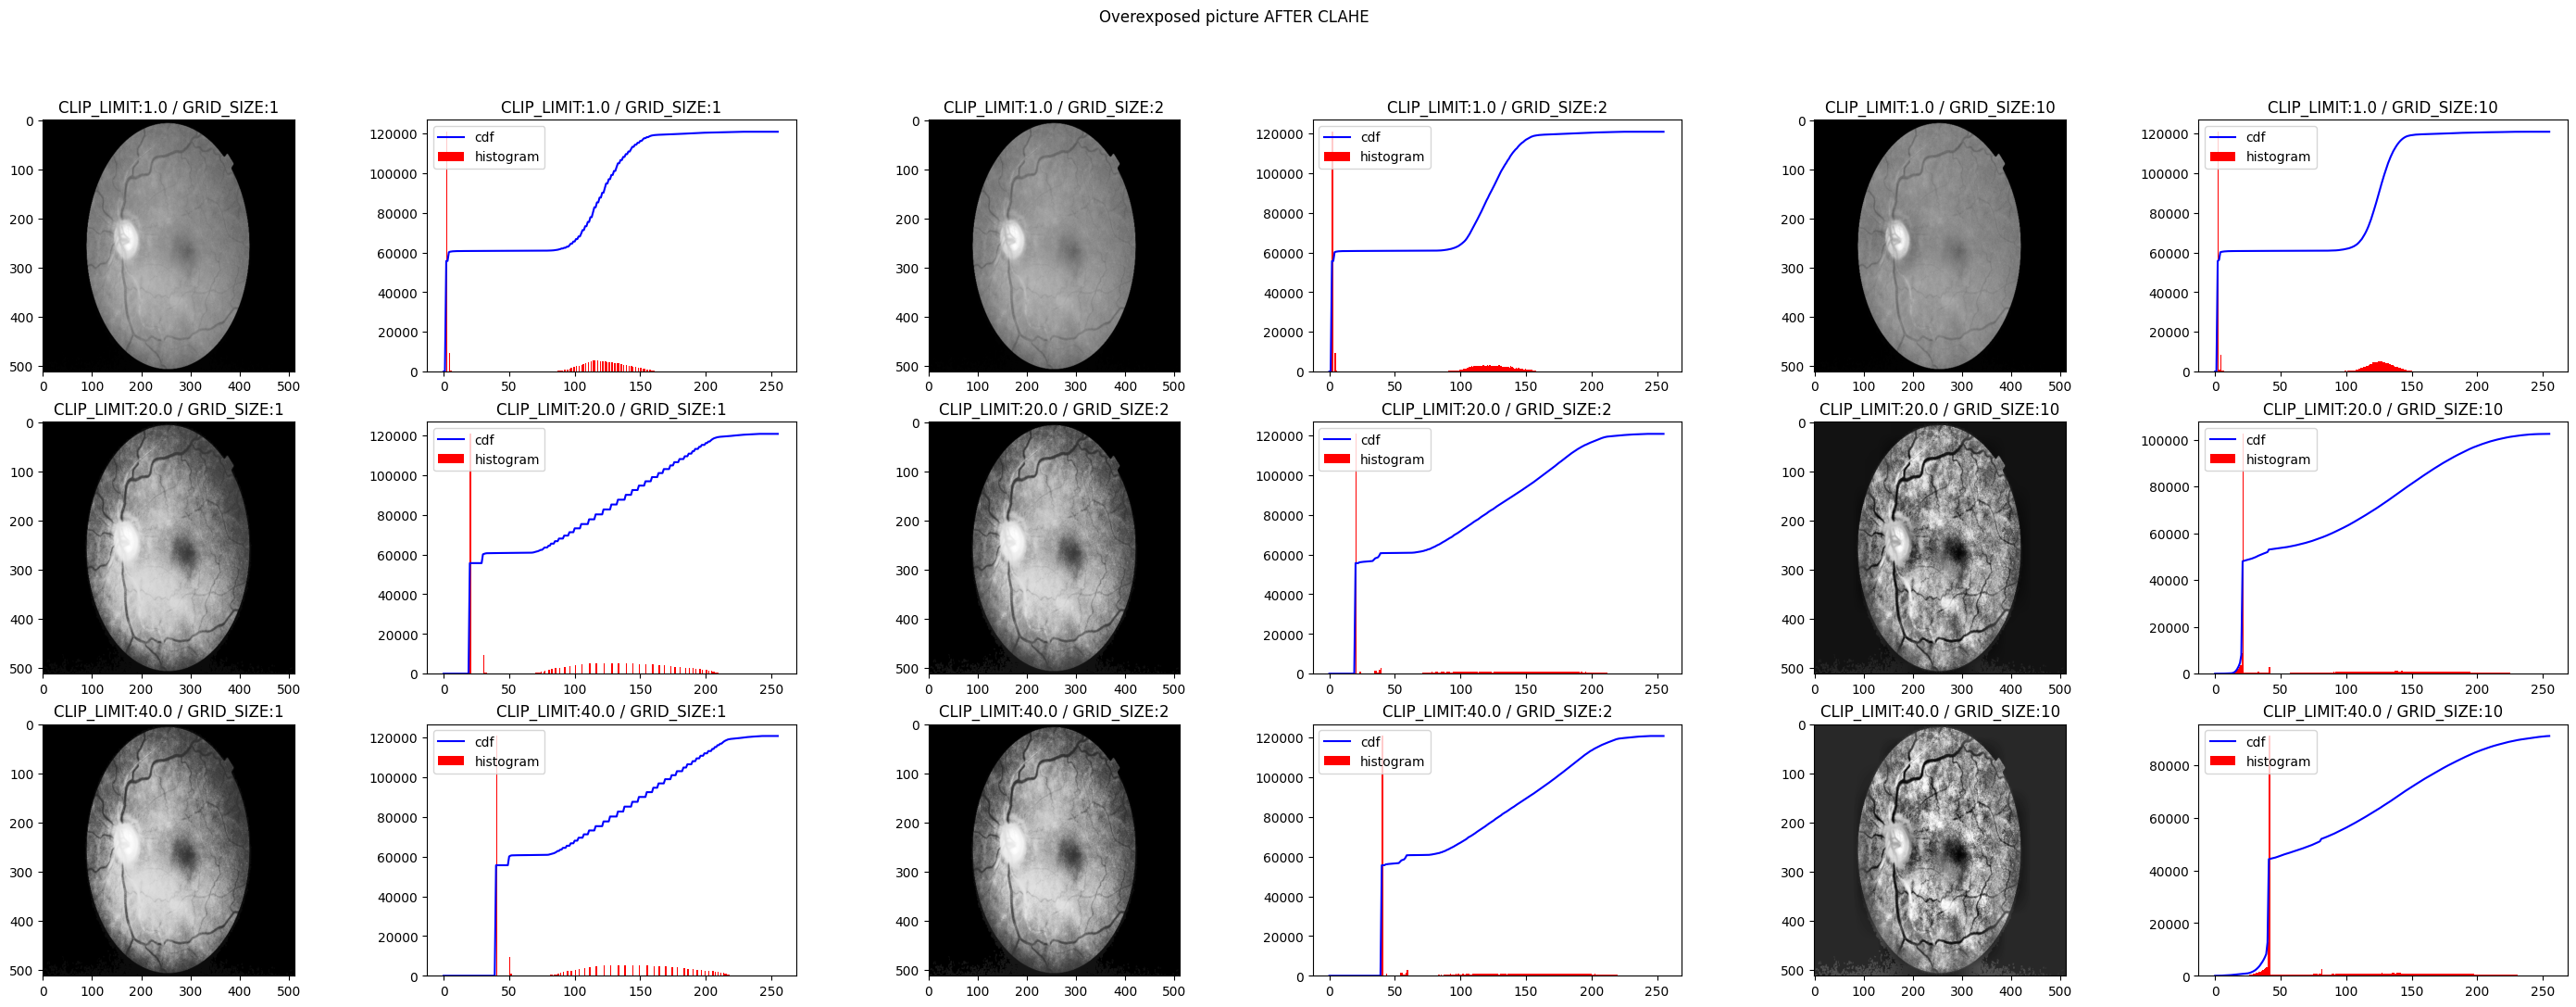

In [ ]:
def plot_channel_histogram(image, ax):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    ax.plot(cdf_normalized, color = 'b')
    ax.hist(image.flatten(),256,[0,256], color = 'r')
    ax.legend(('cdf','histogram'), loc = 'upper left')

def plot_image_histogram(image, ax):
    color = ('r','g','b')
    for i, col in enumerate(color):
        histr = cv2.calcHist([image],[i],None,[256],[0,256])
        ax.plot(histr,color = col)

#This parameter sets the threshold for contrast limiting. The default value is 40.
CLIP_LIMIT = [1.0, 20.0, 40.0]
len_CL = len(CLIP_LIMIT)

# This sets the number of tiles in the row and column. By default this is 8×8. It is used while the image is divided into tiles for applying CLAHE.
GRID_SIZE = [1, 2, 10]
len_GS = len(GRID_SIZE)

fig, axs = plt.subplots(len_CL, len_GS*2, figsize=(len_GS*12,len_CL*4))
fig.suptitle('Overexposed picture AFTER CLAHE')

# Equalizing grayscale images
for i in range(len_CL):
    for j in range(len_GS):
        clahe = cv2.createCLAHE(clipLimit=CLIP_LIMIT[i], tileGridSize=(GRID_SIZE[j],GRID_SIZE[j]))
        equ = clahe.apply(gray_image)
        axs[i][2*j].imshow(equ, cmap="gray")
        plot_channel_histogram(equ, axs[i][2*j+1])

        axs[i][2*j].set_title("CLIP_LIMIT:" + str(CLIP_LIMIT[i]) + " / GRID_SIZE:" + str(GRID_SIZE[j]))
        axs[i][2*j+1].set_title("CLIP_LIMIT:" + str(CLIP_LIMIT[i]) + " / GRID_SIZE:" + str(GRID_SIZE[j]))

plt.show()

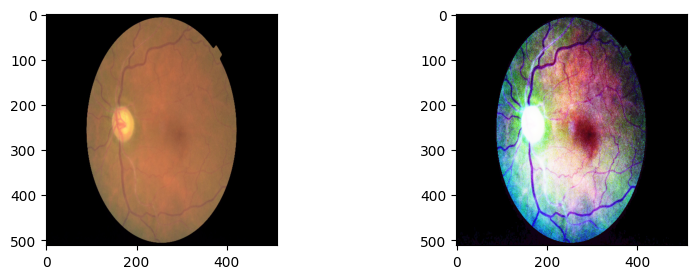

In [ ]:
def preprocessing1(img):
    red, green, blue = cv2.split(img)
    hist_red = cv2.equalizeHist(red)
    hist_green = cv2.equalizeHist(green)
    hist_blue = cv2.equalizeHist(blue)
    img_eq = cv2.merge((hist_red, hist_green, hist_blue))
    return img_eq


pr1= preprocessing1(rgb_image)
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.imshow(rgb_image)
plt.subplot(1,3,2)
plt.imshow(pr1)

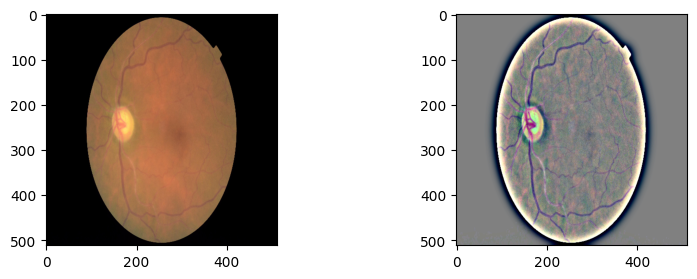

In [ ]:
#gaussian blur
def preprocessing2(img):
    img_ben = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), 10), -4, 128)
    return img_ben

pr2= preprocessing2(rgb_image)
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.imshow(rgb_image)
plt.subplot(1,3,2)
plt.imshow(pr2)

In [ ]:
#hi